In [26]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch import nn, optim
from tqdm import tqdm
import pickle
import pdb
import os
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 14
base = 'Figures'

# Plot A

In [27]:
with open("EWC_a.pickle", 'rb') as f:
    ewc = pickle.load(f)
    
with open("L2_a.pickle", 'rb') as f:
    l2 = pickle.load(f)
    
with open("SGD_a.pickle", 'rb') as f:
    sgd = pickle.load(f)

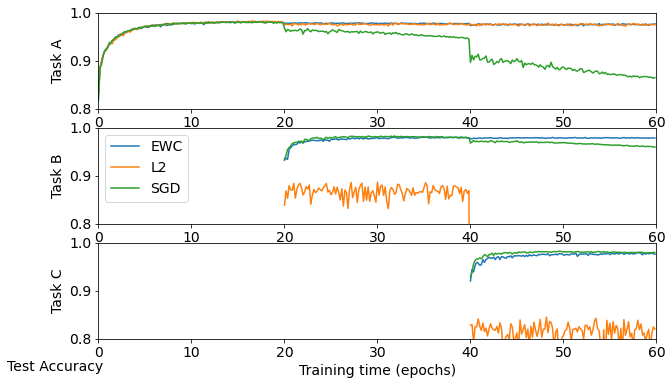

In [28]:
fig,a = plt.subplots(3,1)
for data, lab in [(ewc, "EWC"), (l2, "L2"), (sgd, "SGD")]:
    for i in range(3):
        x = np.arange(360) / 6
        x = x[i * 120:]
        a[i].plot(x, data[i], label=lab)
        
tasks = ["A", "B", "C"]
for i, ax in enumerate(a):
    ax.set_ylim(0.8, 1)
    ax.set_xlim(0, 60)
    ax.set_ylabel("Task {}".format(tasks[i]))

# a[1].set_ylabel("Test Accuracy")
fig.text(0.065, 0.05, 'Test Accuracy', ha='center')
a[1].legend()
plt.xlabel("Training time (epochs)")
plt.savefig(os.path.join(base, "Plot_a.jpg"), dpi=360)

# Plot B

In [14]:
with open("EWC_2b.pickle", 'rb') as f:
    ewc2b = pickle.load(f)
    
with open("Dropout_2b.pickle", 'rb') as f:
    dropout2b = pickle.load(f)
    
with open("EWC_3b.pickle", 'rb') as f:
    ewc3b = pickle.load(f)

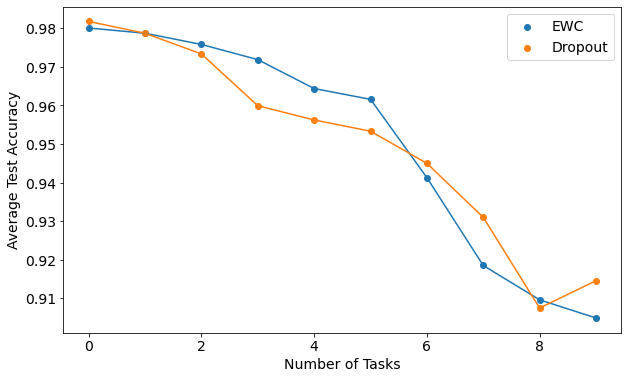

In [15]:
plt.plot(range(10), ewc2b)
plt.scatter(range(10), ewc2b, label="EWC")
plt.plot(range(10), dropout2b)
plt.scatter(range(10), dropout2b, label="Dropout")
plt.ylabel("Average Test Accuracy")
plt.xlabel("Number of Tasks")
plt.legend()
plt.savefig(os.path.join(base, "Plot_b1.jpg"), dpi=360)

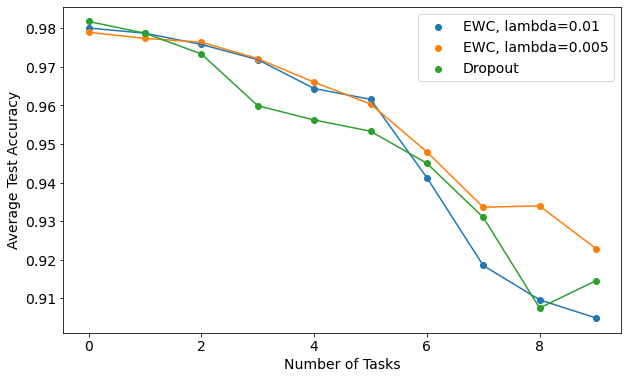

In [16]:
plt.plot(range(10), ewc2b)
plt.scatter(range(10), ewc2b, label="EWC, lambda=0.01")
plt.plot(range(10), ewc3b)
plt.scatter(range(10), ewc3b, label="EWC, lambda=0.005")
plt.plot(range(10), dropout2b)
plt.scatter(range(10), dropout2b, label="Dropout")
plt.ylabel("Average Test Accuracy")
plt.xlabel("Number of Tasks")
plt.legend()
plt.savefig(os.path.join(base, "Plot_b2.jpg"), dpi=360)

# Plot C

In [17]:
with open("8_c.pickle", 'rb') as f:
    data8 = pickle.load(f)
    
with open("26_c.pickle", 'rb') as f:
    data26 = pickle.load(f)

In [18]:
overlaps8 = []
for w1, w2 in zip(data8[0], data8[1]):
    if len(w1.shape) != 2 or w1.shape[0] != w1.shape[1]:
        continue
    w1 = w1.cpu().detach().numpy()
    w2 = w2.cpu().detach().numpy()
    f1 = w1 / np.trace(w1)
    f2 = w2 / np.trace(w2)
    overlaps8.append(1 - (0.5 * np.trace(f1 + f2 - 2 * (np.sqrt(f1 * f2)))))

In [19]:
overlaps26 = []
for w1, w2 in zip(data26[0], data26[1]):
    if len(w1.shape) != 2 or w1.shape[0] != w1.shape[1]:
        continue
    w1 = w1.cpu().detach().numpy()
    w2 = w2.cpu().detach().numpy()
    f1 = w1 / np.trace(w1)
    f2 = w2 / np.trace(w2)
    overlaps26.append(1 - (0.5 * np.trace(f1 + f2 - 2 * (np.sqrt(f1 * f2)))))

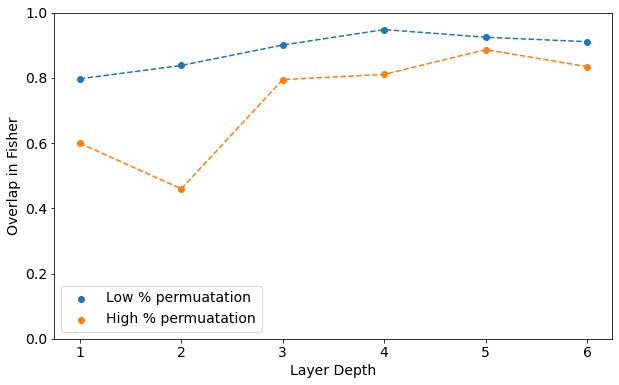

In [20]:
plt.plot(np.arange(len(overlaps8)) + 1, overlaps8, linestyle='--')
plt.scatter(np.arange(len(overlaps8)) + 1, overlaps8, label="Low % permuatation")
plt.plot(np.arange(len(overlaps26)) + 1, overlaps26, linestyle='--')
plt.scatter(np.arange(len(overlaps26)) + 1, overlaps26, label="High % permuatation")
plt.ylim(0, 1)
plt.xlabel("Layer Depth")
plt.ylabel("Overlap in Fisher")
plt.legend()
plt.savefig(os.path.join(base, "Plot_c.jpg"), dpi=360)

NameError: name 'data2' is not defined

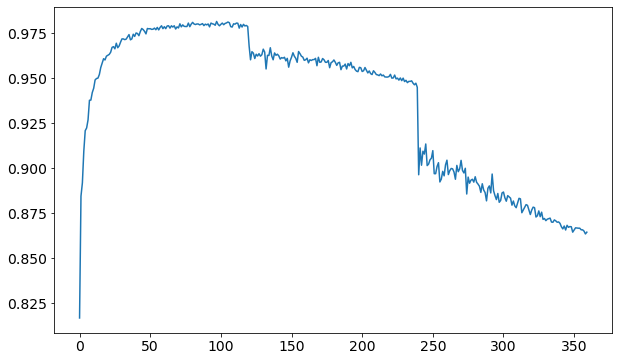

In [21]:
plt.plot(data[0])
# plt.scatter([x+1 for x in range(10)], data)

plt.plot(data2[0])
# plt.scatter([x+1 for x in range(10)], data2)

In [22]:
cur_trset = datasets.MNIST('./files', train=True)

RuntimeError: Dataset not found. You can use download=True to download it

In [5]:
x = np.array(cur_trset[1][0])

In [6]:
class ScrambleSize(object):

    def __init__(self, size):
        self.seed = np.random.randint(10 ** 8)
        self.size = size // 2

    def __call__(self, pic):
        """
        Args:
            pic (PIL Image or numpy.ndarray): Image to be converted to tensor.
        Returns:
            np.array: Image scrambled and converted to numpy array.
        """
        rng = np.random.default_rng(self.seed)
        pic = np.array(pic)
        rng.shuffle(pic[14 - self.size:14 + self.size, 14 - self.size:14 + self.size].flat)
        pic = (pic / 255).astype(float)
        return pic

    def __repr__(self):
        return self.__class__.__name__ + '()'

In [7]:
s = ScrambleSize(8)

In [12]:
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
z = np.array([2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
rng = np.random.default_rng(1)
rng.shuffle(y)
y

array([6, 1, 2, 5, 3, 7, 4, 8])

In [14]:
rng = np.random.default_rng(1)
rng.shuffle(z)
z

array([7, 2, 3, 6, 4, 8, 5, 9])

In [36]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 1200),
            nn.ReLU(),
            nn.Linear(1200, 1200),
            nn.ReLU(),
            nn.Linear(1200, 10)
        )

    def forward(self, x):
        return self.model(x.float())

In [37]:
n = Net()